# Exploratory Data Analysis of Venetian Vostizza

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pywaffle import Waffle

In [2]:
df = pd.read_csv("Villas_data2019update.csv")
df.head()

,Group,Area_meters,Area_ha,Beehives,Cattle,cult_meters,cult_ha,DesHouses,DesPrivMills,DesPubMills,...,MillsDestroyed,MillsIntact,MillsTotal,Monks,MulberryTrees,NativeFamilies,NativePop,OlivePresses,OliveTrees,RuinedFountains
0,GR01,2.480213e+07,2480.212604,0.0,0.0,5346911.474,534.691147,2.0,0.0,1.0,...,1.0,4.0,5.0,0.0,2.0,1.0,4.21,0.0,1500.0,6.0
1,GR02,4.815987e+06,481.598666,31.0,3.0,3742840.187,374.284019,0.0,1.0,1.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.00,0.0,6.0,0.0
2,GR03,5.089809e+06,508.980915,0.0,0.0,3567053.232,356.705323,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,7.0,29.47,0.0,0.0,0.0
3,GR04,5.402839e+05,54.028393,2.0,0.0,117418.991,11.741899,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,GR05,5.265505e+06,526.550537,5.0,42.0,1755223.894,175.522389,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [3]:
df.tail()

,Group,Area_meters,Area_ha,Beehives,Cattle,cult_meters,cult_ha,DesHouses,DesPrivMills,DesPubMills,...,MillsDestroyed,MillsIntact,MillsTotal,Monks,MulberryTrees,NativeFamilies,NativePop,OlivePresses,OliveTrees,RuinedFountains
30,GR31,4.987934e+06,498.793442,0.0,0.0,8.586049e+05,85.860487,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,30.0,1.0,4.21,0.0,150.0,0.0
31,GR32,9.525746e+06,952.574551,2.0,34.0,2.814864e+06,281.486366,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,16.0,67.36,0.0,15.0,0.0
32,GR33,6.153373e+07,6153.372857,270.0,134.0,1.161947e+07,1161.947179,119.0,0.0,7.0,...,7.0,5.0,12.0,0.0,56227.0,129.0,543.09,1.0,2307.0,0.0
33,GR34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,GR35,1.854514e+07,1854.514016,31.0,60.0,1.257855e+07,1257.854579,20.0,0.0,1.0,...,1.0,2.0,3.0,0.0,356.0,25.0,105.25,0.0,88.0,0.0


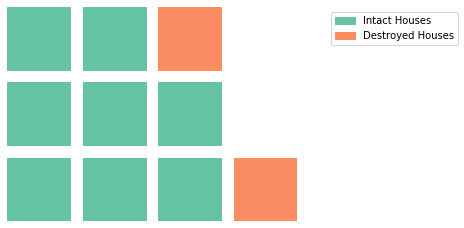

In [5]:
data = {'Intact Houses': 8, 'Destroyed Houses': 2}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=3, 
    values=data, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

In [13]:
land = pd.DataFrame(
{
    'labels': ['Grains', 'Vines', 'Pasture', 'Unused'],
    'GR01: Vostizza': [df.loc[0, 'cult_ha'], df.loc[0, 'vine_ha'], df.loc[0, 'past_ha'], df.loc[0, 'Unused_ha']],
    'GR02: Dimitropoulo': [df.loc[1, 'cult_ha'], df.loc[1, 'vine_ha'], df.loc[1, 'past_ha'], df.loc[1, 'Unused_ha']],
    'GR03: Thelopotamo': [df.loc[2, 'cult_ha'], df.loc[2, 'vine_ha'], df.loc[2, 'past_ha'], df.loc[2, 'Unused_ha']],
    'GR04: Alimocturi': [df.loc[3, 'cult_ha'], df.loc[3, 'vine_ha'], df.loc[3, 'past_ha'], df.loc[3, 'Unused_ha']]
}).set_index('labels')

land.head()

,GR01: Vostizza,GR02: Dimitropoulo,GR03: Thelopotamo,GR04: Alimocturi
labels,,,,
Grains,534.691147,374.284019,356.705323,11.741899
Vines,109.208255,0.000000,0.000000,0.000000
Pasture,0.000000,107.314648,152.275587,0.000000
Unused,1836.313202,0.000000,0.000006,42.286494


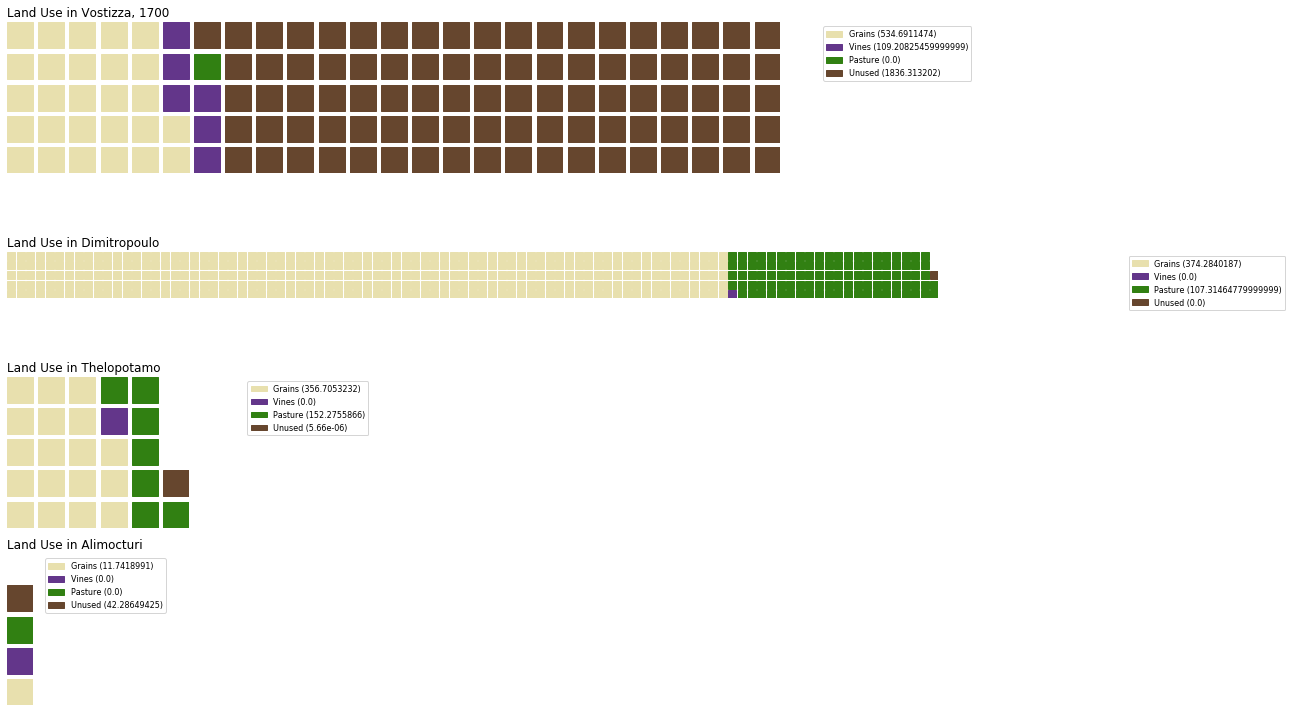

In [15]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '411': {
            'values': land['GR01: Vostizza'] / 20,
            'labels': ["{0} ({1})".format(n, v) for n, v in land['GR01: Vostizza'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Land Use in Vostizza, 1700', 'loc': 'left'}
        },
        '412': {
            'values': land['GR02: Dimitropoulo'] / 20,
            'labels': ["{0} ({1})".format(n, v) for n, v in land['GR02: Dimitropoulo'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Land Use in Dimitropoulo', 'loc': 'left'}
        },
        '413': {
            'values': land['GR03: Thelopotamo'] / 20,
            'labels': ["{0} ({1})".format(n, v) for n, v in land['GR03: Thelopotamo'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': 'Land Use in Thelopotamo', 'loc': 'left'}
        },
        '414': {
            'values': land['GR04: Alimocturi'] / 20,
            'labels': ["{0} ({1})".format(n, v) for n, v in land['GR04: Alimocturi'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': 'Land Use in Alimocturi', 'loc': 'left'}
        },
    },
    rows=5,
    colors=("#e8e0ae", "#63368a", "#318012", "#66462e"),  # Default argument values for subplots
    figsize=(18, 10)  # figsize is a parameter of plt.figure
)
